In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv(r"c:\DATA SCIENCE\Churn_Modelling (1) (2).csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,NaN,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,NaN,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           9970 non-null   object 
 6   Age              9968 non-null   float64
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [6]:
df.isnull().sum()

RowNumber           0
CustomerId          0
Surname             0
CreditScore         0
Geography           0
Gender             30
Age                32
Tenure              0
Balance             0
NumOfProducts       0
HasCrCard           0
IsActiveMember      0
EstimatedSalary     0
Exited              0
dtype: int64

In [7]:
df["Age"]=df["Age"].fillna(df["Age"].median())
df["Gender"]=df["Gender"].fillna(df["Gender"].ffill())

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,37.0,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,37.0,2,125510.82,1,1,1,79084.10,0


In [10]:
df.drop(["RowNumber","CustomerId"],axis=1,inplace=True)

In [11]:
df.drop(["Surname"],axis=1,inplace=True)

In [12]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,37.0,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,37.0,2,125510.82,1,1,1,79084.10,0


In [13]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df["Gender"]=encoder.fit_transform(df["Gender"])

In [14]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42.0,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41.0,1,83807.86,1,0,1,112542.58,0
2,502,France,0,37.0,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39.0,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,37.0,2,125510.82,1,1,1,79084.10,0


In [15]:
df["Geography"]=encoder.fit_transform(df["Geography"])

In [16]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42.0,2,0.00,1,1,1,101348.88,1
1,608,2,0,41.0,1,83807.86,1,0,1,112542.58,0
2,502,0,0,37.0,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39.0,1,0.00,2,0,0,93826.63,0
4,850,2,0,37.0,2,125510.82,1,1,1,79084.10,0


In [17]:
df.dtypes

CreditScore          int64
Geography            int64
Gender               int64
Age                float64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [18]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

<Axes: >

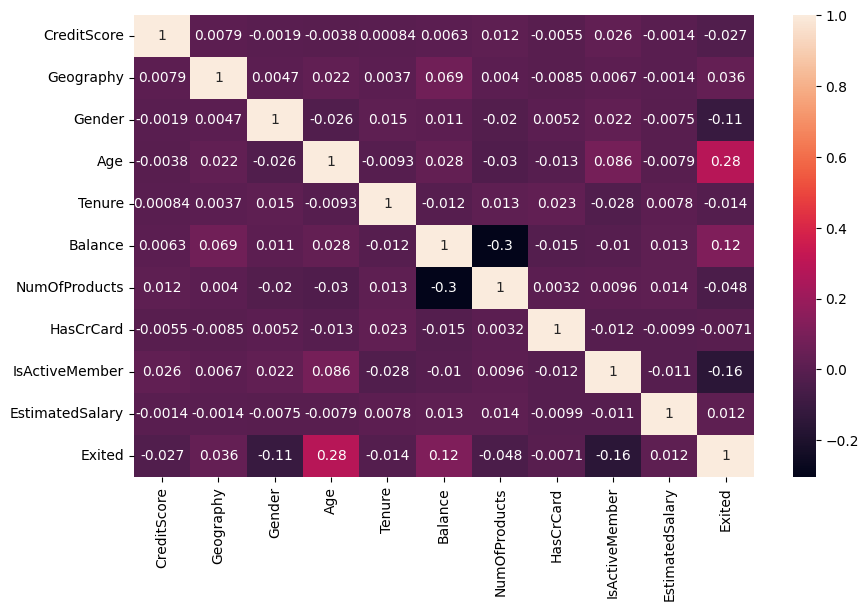

In [19]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

<Axes: >

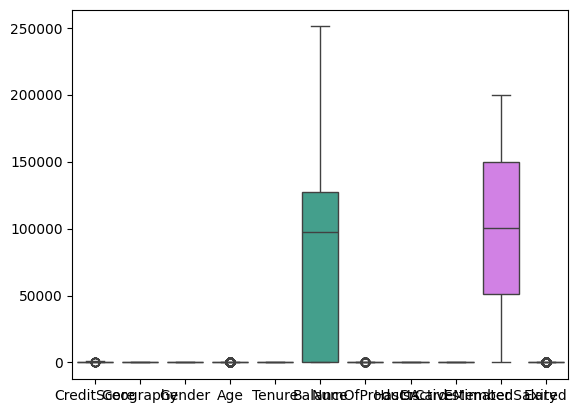

In [20]:
sns.boxplot(data=df)

In [21]:
x=df.drop("EstimatedSalary",axis=1)
y=df["EstimatedSalary"]
x
y

0       101348.88
1       112542.58
2       113931.57
3        93826.63
4        79084.10
          ...    
9995     96270.64
9996    101699.77
9997     42085.58
9998     92888.52
9999     38190.78
Name: EstimatedSalary, Length: 10000, dtype: float64

linear model

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=20,train_size=0.86)
x_train.shape,x_test.shape

((8600, 10), (1400, 10))

<Axes: >

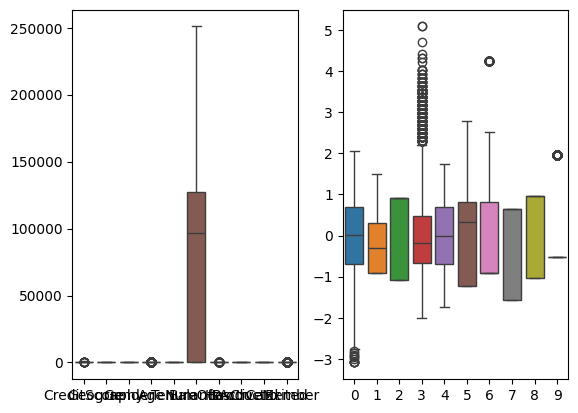

In [25]:
plt.subplot(1,2,1)
sns.boxplot(data=x_train)
plt.subplot(1,2,2)
sns.boxplot(data=x_train_scaled)

In [24]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [26]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_predict=model.predict(x_test)
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print(r2_score(y_test,y_predict))
print(mean_squared_error(y_test,y_predict))
print(mean_absolute_error(y_test,y_predict))

-0.006231077822565156
3327222179.726709
49726.62071066493


In [27]:
model.fit(x_train_scaled,y_train)
y_predict_scal=model.predict(x_test_scaled)
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print(r2_score(y_test,y_predict_scal))
print(mean_squared_error(y_test,y_predict_scal))
print(mean_absolute_error(y_test,y_predict_scal))

-0.006231077822566711
3327222179.7267146
49726.62071066497


In [28]:
from sklearn.linear_model import Lasso
model_lasso=Lasso()
model_lasso.fit(x_train,y_train)
y_predict_lasso=model_lasso.predict(x_test)
print(r2_score(y_test,y_predict_lasso))
print(mean_squared_error(y_test,y_predict_lasso))
print(mean_absolute_error(y_test,y_predict_lasso))

-0.0062251707815725865
3327202647.396373
49726.49994926033


In [29]:
model_lasso=Lasso()
model_lasso.fit(x_train_scaled,y_train)
y_predict_lasso=model_lasso.predict(x_test_scaled)
print(r2_score(y_test,y_predict_lasso))
print(mean_squared_error(y_test,y_predict_lasso))
print(mean_absolute_error(y_test,y_predict_lasso))

-0.006224713940297333
3327201136.796613
49726.4629380201


In [30]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

logistic regression model

In [31]:
x1=df.drop("Exited",axis=1)
y1=df["Exited"]
x1
y1

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [32]:
x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y1,random_state=42,train_size=0.86)
x_train1.shape,x_test1.shape

((8600, 10), (1400, 10))

In [33]:
from sklearn.linear_model import LogisticRegression
model_log=LogisticRegression()
model_log.fit(x_train1,y_train1)
y_predict_log=model_log.predict(x_test1)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(y_test1,y_predict_log))
print(classification_report(y_test1,y_predict_log))
print(confusion_matrix(y_test1,y_predict_log))

0.8078571428571428
              precision    recall  f1-score   support

           0       0.82      0.98      0.89      1129
           1       0.52      0.09      0.15       271

    accuracy                           0.81      1400
   macro avg       0.67      0.53      0.52      1400
weighted avg       0.76      0.81      0.75      1400

[[1107   22]
 [ 247   24]]


c:\Users\prasa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
from sklearn.linear_model import LogisticRegressionCV
modelcv=LogisticRegressionCV()
modelcv.fit(x_train1,y_train1)
y_predict_cv=modelcv.predict(x_test1)
print(accuracy_score(y_predict_cv,y_test1))
print(confusion_matrix(y_predict_cv,y_test1))
print(classification_report(y_predict_cv,y_test1))

c:\Users\prasa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\prasa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://sciki

0.8157142857142857
[[1095  224]
 [  34   47]]
              precision    recall  f1-score   support

           0       0.97      0.83      0.89      1319
           1       0.17      0.58      0.27        81

    accuracy                           0.82      1400
   macro avg       0.57      0.71      0.58      1400
weighted avg       0.92      0.82      0.86      1400



c:\Users\prasa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


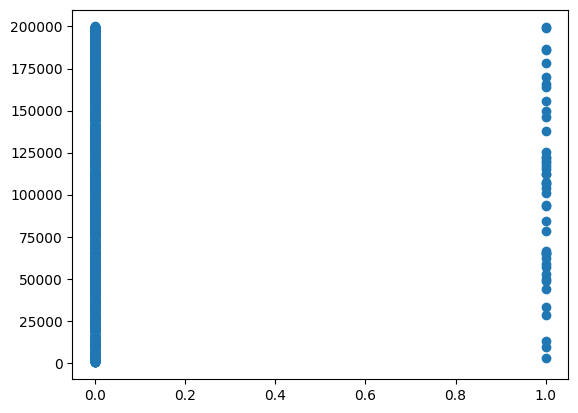

In [35]:
plt.scatter(y_predict_log,y_test)